# Section 1: Dataset
Sunday November 10th, the Bears got destroyed by the Patriots in one of the most depressing performances I have ever seen in my 18 years of life. This comes just two weeks after the choked in the last 10 seconds against the Washington Commanders. Right then and there I decided I wanted to analyze statistics regarding the entire 104 years the Bears have been an organization. I grabbed this data from profootballreference.com, a website apart of the Sports Reference network which is the holy grail of sports encyclopedias essentially. My goal by analyzing this dataset is to find when the Bears were in their "glory days", and when were the Bears in a slump like right now and how long did it take to get out of it, and when did this modern decline begin.

In [1]:
import pandas as pd
df = pd.read_csv("bears(in).csv", encoding="latin-1")


In [2]:
df

,Year,Lg,W,L,T,Div. Finish,Playoffs,PF,PA,PD,...,Yds.1,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
0,2024,NFL,4,4,0,4th of 4,NaN,172,148,24,...,12,5,12,23,32,3.0,-3.0,0.0,-3.9,3.9
1,2023,NFL,7,10,0,3rd of 4,NaN,360,379,-19,...,12,11,19,15,32,-1.1,-0.9,-2.0,-1.2,-0.9
2,2022,NFL,3,14,0,4th of 4,NaN,326,463,-137,...,29,20,31,31,32,-8.1,1.6,-6.4,-2.5,-4.0
3,2021,NFL,6,11,0,3rd of 4,NaN,311,407,-96,...,6,29,24,20,32,-5.6,0.5,-5.2,-4.9,-0.3
4,2020,NFL,8,8,0,2nd of 4,Lost WC,372,370,2,...,11,23,15,20,32,0.1,0.1,0.2,-2.2,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1924,NFL,6,1,4,2nd of 18,NaN,136,55,81,...,1,1,3,1,18,7.4,0.1,7.5,2.7,4.8
101,1923,NFL,9,2,1,2nd of 20,NaN,123,35,88,...,1,1,4,1,20,7.3,-2.2,5.1,0.5,4.6
102,1922,NFL,9,3,0,2nd of 18,NaN,123,44,79,...,1,1,3,1,18,6.6,-0.4,6.1,0.0,6.2
103,1921,APFA,9,1,1,1st of 21,Won Champ,128,53,75,...,1,1,4,1,21,6.8,-3.9,2.9,0.4,2.6


In [3]:
#Here I am dropping the first row because that is data from the 2024 season which has not finished yet.
df1 = df.drop(0)
df1

,Year,Lg,W,L,T,Div. Finish,Playoffs,PF,PA,PD,...,Yds.1,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
1,2023,NFL,7,10,0,3rd of 4,NaN,360,379,-19,...,12,11,19,15,32,-1.1,-0.9,-2.0,-1.2,-0.9
2,2022,NFL,3,14,0,4th of 4,NaN,326,463,-137,...,29,20,31,31,32,-8.1,1.6,-6.4,-2.5,-4.0
3,2021,NFL,6,11,0,3rd of 4,NaN,311,407,-96,...,6,29,24,20,32,-5.6,0.5,-5.2,-4.9,-0.3
4,2020,NFL,8,8,0,2nd of 4,Lost WC,372,370,2,...,11,23,15,20,32,0.1,0.1,0.2,-2.2,2.4
5,2019,NFL,8,8,0,3rd of 4,NaN,280,298,-18,...,8,15,19,21,32,-1.1,0.2,-0.9,-5.4,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1924,NFL,6,1,4,2nd of 18,NaN,136,55,81,...,1,1,3,1,18,7.4,0.1,7.5,2.7,4.8
101,1923,NFL,9,2,1,2nd of 20,NaN,123,35,88,...,1,1,4,1,20,7.3,-2.2,5.1,0.5,4.6
102,1922,NFL,9,3,0,2nd of 18,NaN,123,44,79,...,1,1,3,1,18,6.6,-0.4,6.1,0.0,6.2
103,1921,APFA,9,1,1,1st of 21,Won Champ,128,53,75,...,1,1,4,1,21,6.8,-3.9,2.9,0.4,2.6


In [4]:
#Here I am dropping the playoff column as it is irrelevant in this context, as you are not in full control as it also comes down to others teams performances which you do not have control over always
df2 = df1.drop(columns="Playoffs", axis = 1)
df2

,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,Yds.1,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
1,2023,NFL,7,10,0,3rd of 4,360,379,-19,Eberflus,...,12,11,19,15,32,-1.1,-0.9,-2.0,-1.2,-0.9
2,2022,NFL,3,14,0,4th of 4,326,463,-137,Eberflus,...,29,20,31,31,32,-8.1,1.6,-6.4,-2.5,-4.0
3,2021,NFL,6,11,0,3rd of 4,311,407,-96,Nagy,...,6,29,24,20,32,-5.6,0.5,-5.2,-4.9,-0.3
4,2020,NFL,8,8,0,2nd of 4,372,370,2,Nagy,...,11,23,15,20,32,0.1,0.1,0.2,-2.2,2.4
5,2019,NFL,8,8,0,3rd of 4,280,298,-18,Nagy,...,8,15,19,21,32,-1.1,0.2,-0.9,-5.4,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1924,NFL,6,1,4,2nd of 18,136,55,81,Halas,...,1,1,3,1,18,7.4,0.1,7.5,2.7,4.8
101,1923,NFL,9,2,1,2nd of 20,123,35,88,Halas,...,1,1,4,1,20,7.3,-2.2,5.1,0.5,4.6
102,1922,NFL,9,3,0,2nd of 18,123,44,79,Halas,...,1,1,3,1,18,6.6,-0.4,6.1,0.0,6.2
103,1921,APFA,9,1,1,1st of 21,128,53,75,Halas,...,1,1,4,1,21,6.8,-3.9,2.9,0.4,2.6


In [5]:
#Here I created a win percentage column because over the course of the 103 years the Bears have been around, the number of games played in a season has changed, due to new rules, lockdowns, and World Wars
df2["W%"] = (df2["W"] / (df2["W"] + df2["L"] + df2["T"]))*100
df2

,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
1,2023,NFL,7,10,0,3rd of 4,360,379,-19,Eberflus,...,11,19,15,32,-1.1,-0.9,-2.0,-1.2,-0.9,41.176471
2,2022,NFL,3,14,0,4th of 4,326,463,-137,Eberflus,...,20,31,31,32,-8.1,1.6,-6.4,-2.5,-4.0,17.647059
3,2021,NFL,6,11,0,3rd of 4,311,407,-96,Nagy,...,29,24,20,32,-5.6,0.5,-5.2,-4.9,-0.3,35.294118
4,2020,NFL,8,8,0,2nd of 4,372,370,2,Nagy,...,23,15,20,32,0.1,0.1,0.2,-2.2,2.4,50.000000
5,2019,NFL,8,8,0,3rd of 4,280,298,-18,Nagy,...,15,19,21,32,-1.1,0.2,-0.9,-5.4,4.5,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1924,NFL,6,1,4,2nd of 18,136,55,81,Halas,...,1,3,1,18,7.4,0.1,7.5,2.7,4.8,54.545455
101,1923,NFL,9,2,1,2nd of 20,123,35,88,Halas,...,1,4,1,20,7.3,-2.2,5.1,0.5,4.6,75.000000
102,1922,NFL,9,3,0,2nd of 18,123,44,79,Halas,...,1,3,1,18,6.6,-0.4,6.1,0.0,6.2,75.000000
103,1921,APFA,9,1,1,1st of 21,128,53,75,Halas,...,1,4,1,21,6.8,-3.9,2.9,0.4,2.6,81.818182


# Section 2: Exploratory Data Analysis
For my EDA I am looking at 3 stats which I believe will provide valuable insight to showing performance trends over time. One is the W% column which we previously made. As previously stated I created this coloumn as in the course of the 103 years the number of games in a season varies. So we instead we look at win percentage to see if a team is winning more than losing. I look at the mean/median to see what the average win percentage has been to see as a franchise overall how much are we winning. I look at the standard deviation to see if this is occuring at a frequent rate or is it all over the case. I then created a dataframe to see when W% was 50% or greater, as this can be a good indication of a successful season. Finally I looked at when W% was greatest and smallest to see the best and worst seasons. I also looked at PD column(point differential) which tell us the difference in total points scored over a season the Bears scored and the total point the opponent teams scored. Once again you can find the mean, median, and standard deviaition to find the average PD and how much that has varied over time. Finally I created a dataframe to see how many seasons were the Bears able to keep the PD at 0, meaning the bears were able to match or do better against their opponents. Finally I looked at the SRS(Simple Rating System) score. This is a really cool metric Pro Football Reference made which basically shows how many points on average are the Bears better or worse than their opponents. There is a complex equation used which takes into account various stats including home-field advantage, strength of schedule, margin of victory, etc. Once again I look at the mean, median, and standard deviation as it can tell us the average rating of the Bears, and the spread of it over 103 years. I then switched it up and made a data frame to see when the Bears had a negative SRS score, to see when they were worse than their opponents (why always be positive?). Finally I looked at the year the Bears had their highest SRS (to see the glory) and the lowest SRS (to see the dark days). My hope by looking at these various descriptive statistics over the three metrocs is to be able to see how the Bears have varied over 103 years, and see if the Bears have had a more success than failure, or vice versa. 

In [6]:

df2["W%"].mean()

np.float64(54.915985927722346)

In [7]:
df2["W%"].median()

np.float64(54.54545454545454)

In [8]:
df2["W%"].std()

np.float64(20.125688613098173)

In [9]:
df_high_win_percentage = df2[df2["W%"] >= 50]
df_high_win_percentage

,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
4,2020,NFL,8,8,0,2nd of 4,372,370,2,Nagy,...,23,15,20,32,0.1,0.1,0.2,-2.2,2.4,50.000000
5,2019,NFL,8,8,0,3rd of 4,280,298,-18,Nagy,...,15,19,21,32,-1.1,0.2,-0.9,-5.4,4.5,50.000000
6,2018,NFL,12,4,0,1st of 4,421,283,138,Nagy,...,3,4,5,32,8.6,-2.3,6.3,1.5,4.8,75.000000
11,2013,NFL,8,8,0,2nd of 4,445,478,-33,Trestman,...,11,21,19,32,-2.1,-2.1,-4.1,3.0,-7.1,50.000000
12,2012,NFL,10,6,0,3rd of 4,375,277,98,Smith,...,2,6,16,32,6.1,0.8,6.9,1.0,6.0,62.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1924,NFL,6,1,4,2nd of 18,136,55,81,Halas,...,1,3,1,18,7.4,0.1,7.5,2.7,4.8,54.545455
101,1923,NFL,9,2,1,2nd of 20,123,35,88,Halas,...,1,4,1,20,7.3,-2.2,5.1,0.5,4.6,75.000000
102,1922,NFL,9,3,0,2nd of 18,123,44,79,Halas,...,1,3,1,18,6.6,-0.4,6.1,0.0,6.2,75.000000
103,1921,APFA,9,1,1,1st of 21,128,53,75,Halas,...,1,4,1,21,6.8,-3.9,2.9,0.4,2.6,81.818182


In [10]:
df_best_percentage = df2.nlargest(15, "W%")
df_best_percentage

,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
82,1942,NFL,11,0,0,1st of 5,376,84,292,"Johnsos,Anderson,Halas",...,3,1,1,10,26.5,-5.2,21.4,16.0,5.3,100.000000
90,1934,NFL,13,0,0,1st of 6,286,86,200,Halas,...,4,1,1,11,15.4,-1.0,14.3,10.9,3.4,100.000000
39,1985,NFL,15,1,0,1st of 5,456,198,258,Ditka,...,1,1,1,28,16.1,-0.2,15.9,6.5,9.4,93.750000
83,1941,NFL,10,1,0,1st of 5,396,147,249,Halas,...,2,1,1,10,22.6,-2.4,20.3,19.6,0.7,90.909091
38,1986,NFL,14,2,0,1st of 5,352,187,165,Ditka,...,14,1,1,28,10.3,-2.7,7.6,-0.1,7.7,87.500000
76,1948,NFL,10,2,0,2nd of 5,375,151,224,Halas,...,3,1,2,10,18.7,-1.3,17.3,6.5,10.9,83.333333
87,1937,NFL,9,1,1,1st of 5,201,100,101,Halas,...,2,1,4,10,9.2,0.6,9.7,5.6,4.1,81.818182
103,1921,APFA,9,1,1,1st of 21,128,53,75,Halas,...,1,4,1,21,6.8,-3.9,2.9,0.4,2.6,81.818182
18,2006,NFL,13,3,0,1st of 4,427,255,172,Smith,...,4,2,10,32,10.8,-2.9,7.9,4.9,3.0,81.250000
23,2001,NFL,13,3,0,1st of 5,338,203,135,Jauron,...,4,3,21,31,8.4,-0.5,7.9,0.9,7.1,81.250000


In [11]:
df_worst_percentage = df2.nsmallest(15, "W%")
df_worst_percentage

,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
55,1969,NFL,1,13,0,4th of 4,210,339,-129,Dooley,...,14,15,11,16,-9.2,3.4,-5.9,-3.2,-2.6,7.142857
2,2022,NFL,3,14,0,4th of 4,326,463,-137,Eberflus,...,20,31,31,32,-8.1,1.6,-6.4,-2.5,-4.0,17.647059
8,2016,NFL,3,13,0,4th of 4,279,399,-120,Fox,...,31,28,12,32,-7.5,0.0,-7.5,-5.2,-2.3,18.750000
51,1973,NFL,3,11,0,4th of 4,195,334,-139,Gibron,...,22,23,23,26,-9.9,1.1,-8.8,-4.4,-4.5,21.428571
22,2002,NFL,4,12,0,3rd of 4,281,379,-98,Jauron,...,23,27,29,32,-6.1,0.9,-5.3,-4.4,-0.9,25.000000
26,1998,NFL,4,12,0,5th of 5,276,368,-92,Wannstedt,...,22,24,18,30,-5.8,2.0,-3.7,-3.4,-0.3,25.000000
27,1997,NFL,4,12,0,5th of 5,263,421,-158,Wannstedt,...,26,29,11,30,-9.9,1.4,-8.5,-3.1,-5.3,25.000000
71,1953,NFL,3,8,1,4th of 6,218,262,-44,Halas,...,12,7,8,12,-3.7,-0.9,-4.6,-4.5,0.0,25.000000
95,1929,NFL,4,9,2,9th of 12,119,227,-108,Halas,...,1,9,1,12,-7.2,1.8,-5.4,-1.5,-3.9,26.666667
49,1975,NFL,4,10,0,3rd of 4,191,379,-188,Pardee,...,21,25,23,26,-13.4,1.9,-11.5,-4.9,-6.6,28.571429


In [12]:
df2["PD"].mean()


np.float64(24.846153846153847)

In [13]:
df2["PD"].median()


np.float64(31.0)

In [14]:
df2["PD"].std()


np.float64(99.39982704276423)

In [15]:
df_high_PD = df2[df2["PD"] >= 0]
df_high_PD


,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
4,2020,NFL,8,8,0,2nd of 4,372,370,2,Nagy,...,23,15,20,32,0.1,0.1,0.2,-2.2,2.4,50.000000
6,2018,NFL,12,4,0,1st of 4,421,283,138,Nagy,...,3,4,5,32,8.6,-2.3,6.3,1.5,4.8,75.000000
12,2012,NFL,10,6,0,3rd of 4,375,277,98,Smith,...,2,6,16,32,6.1,0.8,6.9,1.0,6.0,62.500000
13,2011,NFL,8,8,0,3rd of 4,353,341,12,Smith,...,11,16,26,32,0.8,0.9,1.7,-1.5,3.1,50.000000
14,2010,NFL,11,5,0,1st of 4,334,286,48,Smith,...,11,10,22,32,3.0,1.1,4.1,-0.6,4.7,68.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,1924,NFL,6,1,4,2nd of 18,136,55,81,Halas,...,1,3,1,18,7.4,0.1,7.5,2.7,4.8,54.545455
101,1923,NFL,9,2,1,2nd of 20,123,35,88,Halas,...,1,4,1,20,7.3,-2.2,5.1,0.5,4.6,75.000000
102,1922,NFL,9,3,0,2nd of 18,123,44,79,Halas,...,1,3,1,18,6.6,-0.4,6.1,0.0,6.2,75.000000
103,1921,APFA,9,1,1,1st of 21,128,53,75,Halas,...,1,4,1,21,6.8,-3.9,2.9,0.4,2.6,81.818182


In [16]:
df2["SRS"].mean()

np.float64(2.252884615384615)

In [17]:
df2["SRS"].median()

np.float64(2.1500000000000004)

In [18]:
df2["SRS"].std()

np.float64(6.793371365590798)

In [19]:
df_low_SRS = df2[df2["SRS"] <= 0]
df_low_SRS


,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
1,2023,NFL,7,10,0,3rd of 4,360,379,-19,Eberflus,...,11,19,15,32,-1.1,-0.9,-2.0,-1.2,-0.9,41.176471
2,2022,NFL,3,14,0,4th of 4,326,463,-137,Eberflus,...,20,31,31,32,-8.1,1.6,-6.4,-2.5,-4.0,17.647059
3,2021,NFL,6,11,0,3rd of 4,311,407,-96,Nagy,...,29,24,20,32,-5.6,0.5,-5.2,-4.9,-0.3,35.294118
5,2019,NFL,8,8,0,3rd of 4,280,298,-18,Nagy,...,15,19,21,32,-1.1,0.2,-0.9,-5.4,4.5,50.000000
7,2017,NFL,5,11,0,4th of 4,264,320,-56,Fox,...,15,20,26,32,-3.5,2.2,-1.3,-4.6,3.3,31.250000
8,2016,NFL,3,13,0,4th of 4,279,399,-120,Fox,...,31,28,12,32,-7.5,0.0,-7.5,-5.2,-2.3,18.750000
9,2015,NFL,6,10,0,4th of 4,335,397,-62,Fox,...,19,21,16,32,-3.9,2.6,-1.3,-0.1,-1.2,37.500000
10,2014,NFL,5,11,0,4th of 4,319,442,-123,Trestman,...,22,27,28,32,-7.7,1.0,-6.7,-2.0,-4.7,31.250000
11,2013,NFL,8,8,0,2nd of 4,445,478,-33,Trestman,...,11,21,19,32,-2.1,-2.1,-4.1,3.0,-7.1,50.000000
15,2009,NFL,7,9,0,3rd of 4,327,375,-48,Smith,...,23,21,23,32,-3.0,-0.9,-3.9,-1.9,-2.0,43.750000


In [20]:
df2.nsmallest(1, "SRS")

,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
49,1975,NFL,4,10,0,3rd of 4,191,379,-188,Pardee,...,21,25,23,26,-13.4,1.9,-11.5,-4.9,-6.6,28.571429


In [21]:
df2.nlargest(1, "SRS")

,Year,Lg,W,L,T,Div. Finish,PF,PA,PD,Coaches,...,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS,W%
82,1942,NFL,11,0,0,1st of 5,376,84,292,"Johnsos,Anderson,Halas",...,3,1,1,10,26.5,-5.2,21.4,16.0,5.3,100.0


# Section 3: Exploratory Data Visualization
Visualization #1: This visualization looks at the Chicago Bears win percentages over time. I utilized a line graph here to help identify trends over time, periods of success and periods of failures. As this looks at 104 seasons of data, there are periods with massive peaks(meaning many games won) and then near sudden crashes. If I were to look at seasons with success we would conclude the 1920's, 1940's, 1980's, and 2000s. Some rough decades were the 1970's, 1990's, and the 2010's. It seems that right now the Bears following a massive peak in 2018 are on the decline. 

Visualization #2: As previously stated the Simple Rating System is based on a variety of factors. One of those factors is Margin of Victory(MoV), which is the difference your point differential divided by the number of games played. I decided to use a scatterplot to see if MoV truly had that much weight, or were there some other factors at play. We can conclude that MoV and SRS are highly correlated. There are a couple outliers however if we were to draw a treadline on our scatterplot 95% of the data would be on or around that trendline. 

Visualization #3: Here I decided to create a histogram showing the frequency of certain point differentials(PD's). This we can see at what PD's has been the most common throughout the history of the Bears. Based on the histogram we can conclude our data is skewed right, with most of our data on the left side. Majority of our data has a positive PD, meaning the Bears outscored their opponents throughout history. However more than 40% of the seasons have had a negative PD, meaning the Bears were outscored by their opponents. 


<Axes: title={'center': 'Chicago Bears Win Percentage 1920-2023'}, xlabel='Year', ylabel='Win Percentage(%)'>

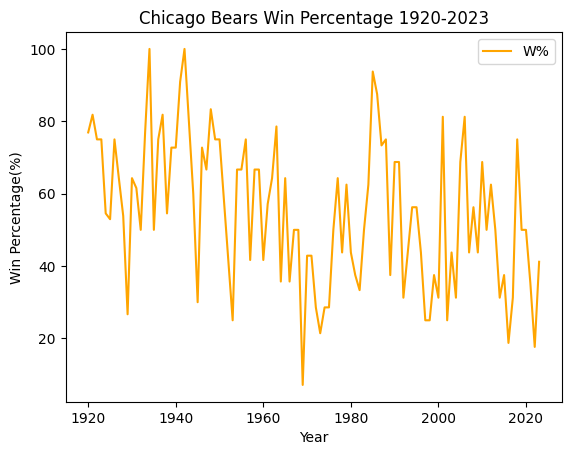

In [22]:
df2.plot.line(x="Year", y="W%", title="Chicago Bears Win Percentage 1920-2023",xlabel="Year", ylabel="Win Percentage(%)", color="Orange")

<Axes: title={'center': 'Margin of Victory vs Simple Rating System'}, xlabel='Margin of Victory(MoV)', ylabel='Simple Rating System(SRS)'>

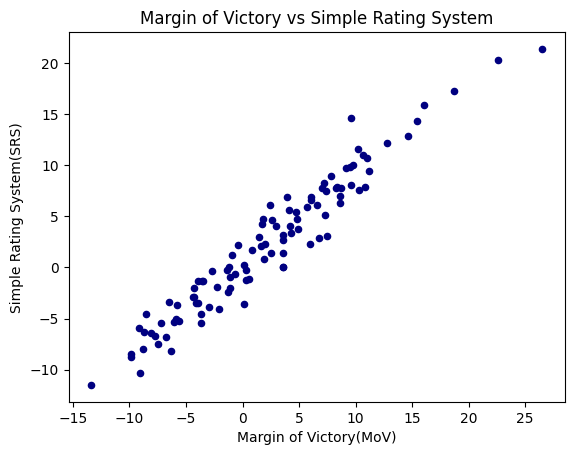

In [23]:
df2.plot.scatter(title = "Margin of Victory vs Simple Rating System", xlabel = "Margin of Victory(MoV)", ylabel = "Simple Rating System(SRS)", x="MoV", y="SRS", color="Navy")

<Axes: title={'center': 'Frequency of Point Differentials'}, xlabel='Point Differentials(PD)', ylabel='Frequency'>

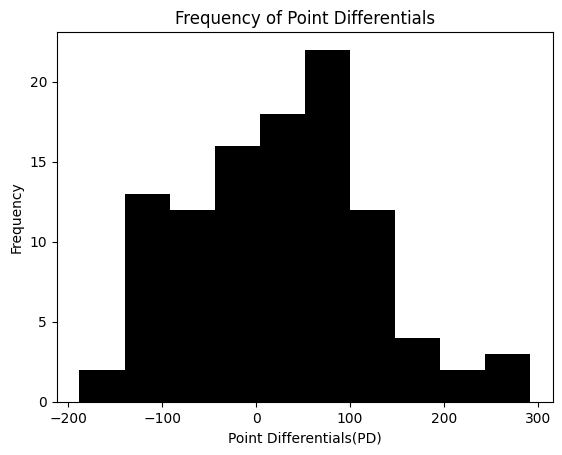

In [24]:
df2["PD"].plot.hist(title = "Frequency of Point Differentials", xlabel = "Point Differentials(PD)", ylabel = "Frequency", bins=10, color = "Black")

# Part 4: Planning for Part II:
To summarize our exploratory data analysis, we can make a conclusion that based on the metrics we looked at, the Bears have been historically slightly above average. For example we found that the mean win percentage(W%) was around 54% which is lightly above average. There were two seasons that the Bears had a 100% win percentage, 1941 and 1942. We find that the most recent season that the Bears made the top 15 win percentage was in 2018. We also find that the the average point differental(PD) was around 24 pts. This means that throughout history the Bears outscored their opponents on average by 24 pts. There were 63 seasons where the PD was positive, meaning the Bears outscored their opponents on a whole. This shows that historically the Bears have been outscoring their opponents. Finally we looked at the Simple Rating System(SRS), where the mean was 2.25. This means the Bears were on average 2.25 points better than their opponents over the years. There were 45 seasons where their SRS was less than 0, meaning the Bears were worse than their opponents. It is important to note that for all three stats there was high variability. The variability for W% was 20.1%, for PD it was 99.3 points, and finally for SRS it was 6.8. This means that in the case for PD and SRS the standard deviation was higher than the actual average, showing just how inconsistent the Bears have been over their 104 seasons we looked at. 

One of the areas I would want to explore for part 2 is first identifying times that the Bears had major success, and the corresponding collapse. You could then track other stats to see which stat the highest correlation with the decline. After that you could do some research on why that occured. Another area I would like at is maybe conducting a simulation. We could do a simulation where we choose a specific metric and fix it, and see if other statistics change. Then you could look at the corresponding win percentage. Finally we could investigate a metric that is similar between the Bears and another team, and see if other stats correspond or not. That's the beauty of sports, it is all a numbers game, so you can use the stats and look at successes and failures. 


# Part 5: Data Science:

I have decided to chose a different question because while I believe my questions were valid, they were a bit bloated and would take a long time to conduct and in some cases would require more datasets. These are definetly questions I would like to answer at a later time once I develop more Data Science skills. I will instead do some machine learning, by creating a linear regresion model to visualize the relationship between Strength of Schedule(SoS) and Win Percentage(W%). Essentially we want to use SoS to predict what the corresponding W% would be. SoS measures the average of strength of the Bears opponents in relation to them. Essentially their schedule strength. A SoS of 0 schedule means that the schedule the Bears on average was average compared to themselves. Positive would mean it was harder on average, and negative would mean it is easier than on average.  The reason why I am curious about this question is because I always hear that a team got "screwed over" simply because they were given a harder schedule than their rivals. So I want to see if we can use SoS to predict W%. For the purposes of this model I have chosen 5 SoS values on the spectrum. 

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(df2[["SoS"]], df2[["W%"]])
data = []
data.append({"SoS":-5})
data.append({"SoS": -1.5})
data.append({"SoS":0})
data.append({"SoS":0.8})
data.append({"SoS": 7})
df2_regression = pd.DataFrame(data)
df2_regression["W%_Prediction"] = model.predict(df2_regression)





In [32]:
df2_regression

,SoS,W%_Prediction
0,-5.0,79.123036
1,-1.5,62.450631
2,0.0,55.305314
3,0.8,51.494479
4,7.0,21.960503


# Part 6: Another Data Visualization
For this data visualization I have decided to do a boxplot to visualize the Strength of Schedule(SoS) score of every season.  We can see the median SoS to see what is the middle 50% of the schedule strength the Bears have, as well as the lower 25% and upper 25%. Based on that info you can find the corresponding stats to see what the average SoS leads to. In addition you can find any outliers to see if there were any seasons the Bears truly had easy or hard schedules and see if their records reflect that. We see that the mean SOS is inbetween 0 and 1, meaning that on average the Bears have had average schedules, meaning their opponents were comporable. We also see that the easiest season had a SOS of lower than -4, which is being classified as an outlier. However the season with the highest SoS of above 4 is not being classified as an outlier. The IQR looks to be about 2.

<Axes: title={'center': 'Median Strength of Schedule(SoS)'}>

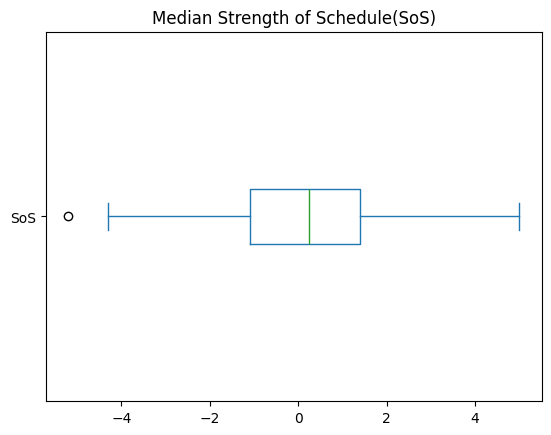

In [26]:
df2["SoS"].plot.box(title = "Median Strength of Schedule(SoS)", vert=False)

# Part 7: Overall Summary
In conclusion, we looked at a dataset showcasing the first 104 seasons of the Chicago Bears, and various stats associated with that. We found that the average win percentage was around 54% meaning the Bears on average during their 104 seasons played "average" to "slightly above average", with a lot of variability as the standard deviation was around 20%. In addition their point differential(PD) on average was 24 points which means on average their total points per season was 24 points greater than their opponent. Finally the average simple rating system(SRS) score was 2.25 meaning on average the Bears were 2.25 points better than their opponents over the 104 seasons. In addition we did four data visualizations where we found the a high correlation between margin of victory(MoV) and simple rating system, the frequency of point of different point differentials is skewed right, and finally that the median strength of schedule score(SoS) is less than 0.5, meaning the middle 50% of SoS was "average". Finally we did some machine learning by creating a linear regression model where we could predict a Bears seasons win percentage based on their SoS score. The lower the SoS, the model predicted that the Bears would win more, while the higher the SoS, the prediction led to a lower win percentage. For example a score of -5 SoS leads to a 74 W% which is very high, while a SoS leads to a measily 21.9% win percentage. The findings found in this project can be used to visualize the history of the Chicago Bears and create predictions for the future. 

# Part 8: Improvements and Corrections
For Part 4 of the project, I have included a summary of my EDA from Part 2. This will provide numerical context to Part 2. This was a step I simply forgot to do, which is really unfortunate. I am glad this mistake has been pointed out, and I can add it to my project. 